### Circular and Elyptical Hough Transforms
[link to example](https://scikit-image.org/docs/stable/auto_examples/edges/plot_circular_elliptical_hough_transform.html#sphx-glr-auto-examples-edges-plot-circular-elliptical-hough-transform-py)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

#### Circle Detection

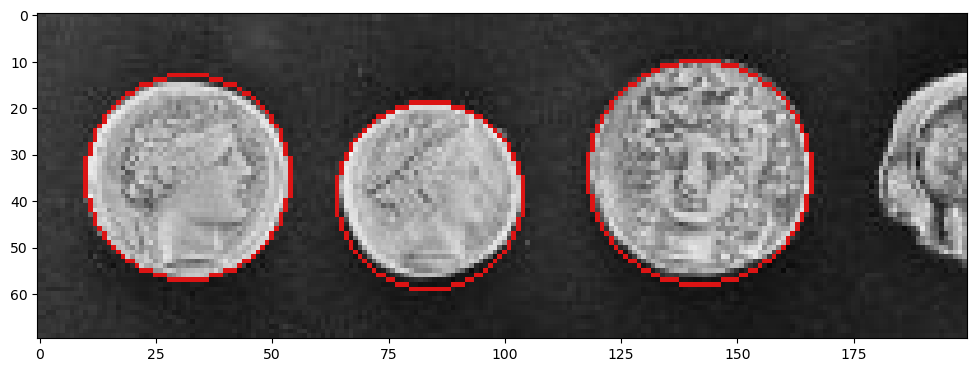

In [ ]:
# Load picture and detect edges
image = skimage.util.img_as_ubyte(skimage.data.coins()[160:230, 70:270])
edges = skimage.feature.canny(image, sigma=3, low_threshold=10, high_threshold=50)

# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = skimage.transform.hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = skimage.transform.hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
image = skimage.color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = skimage.draw.circle_perimeter(center_y, center_x, radius, shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

#### Ellipse Detection

result: 7


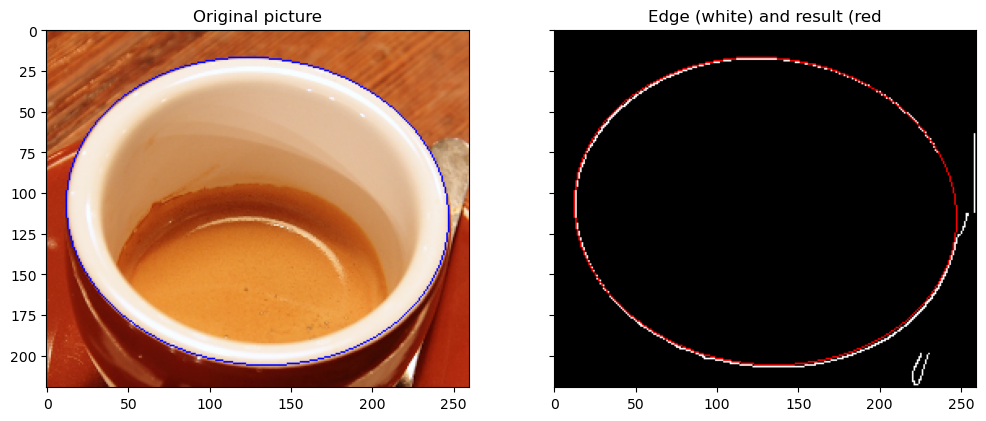

In [ ]:
# Load picture, convert to grayscale and detect edges
image_rgb = skimage.data.coffee()[0:220, 160:420]
image_gray = skiage.color.rgb2gray(image_rgb)
edges = skimage.feature.canny(image_gray, sigma=2.0, low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = skimage.transform.hough_ellipse(edges, accuracy=20, threshold=250, min_size=100, max_size=120)
result.sort(order='accumulator')

print(f"result: {len(result)}")
# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = skimage.draw.ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = skimage.color.gray2rgb(skimage.util.img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,6), sharex=True, sharey=True)

ax1.set_title("Original picture")
ax1.imshow(image_rgb)

ax2.set_title("Edge (white) and result (red")
ax2.imshow(edges)

plt.show()